C:\Users\Ken.Pryor\AppData\Local\Temp\1\ipykernel_436\2313026246.py:17: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above


Frequency:  [ 23.8    31.4    50.3    52.799  53.595  54.4    54.941  55.499  57.29
  57.29   57.29   57.29   57.29   57.29   89.     89.    157.    183.311
 183.311 190.311]
TB16 mean =  257.00132666666667
TB17 mean =  280.99880148148145
TB20 mean =  273.85907814814817
CLW mean =  0.015642592592592593
GWP mean =  0.00491995212089474
Lats mean=  33.59563
Lons mean=  -69.005455
TB16 max = 289.8
TB16 min = 202.71
TB16 =  [[274.74 273.58 274.59000000000003 ... 272.35 272.0 272.28000000000003]
 [278.89 276.81 275.11 ... 271.43 272.4 272.01]
 [283.01 282.0 275.26 ... 270.96 270.86 271.11]
 ...
 [272.86 272.81 266.73 ... 227.91 224.21 232.71]
 [272.51 272.38 267.89 ... 227.6 224.19 232.97]
 [272.67 273.16 272.45 ... 227.45000000000002 224.53 233.44]] (300, 90)
TB17 max = 290.98
TB17 min = 178.31
TB17 =  [[273.54 273.77 276.15000000000003 ... 282.24 278.17 277.72]
 [274.88 276.55 276.39 ... 283.73 281.77 281.55]
 [278.22 279.13 276.59000000000003 ... 284.5 284.31 282.89]
 ...
 [281.35 281.04 

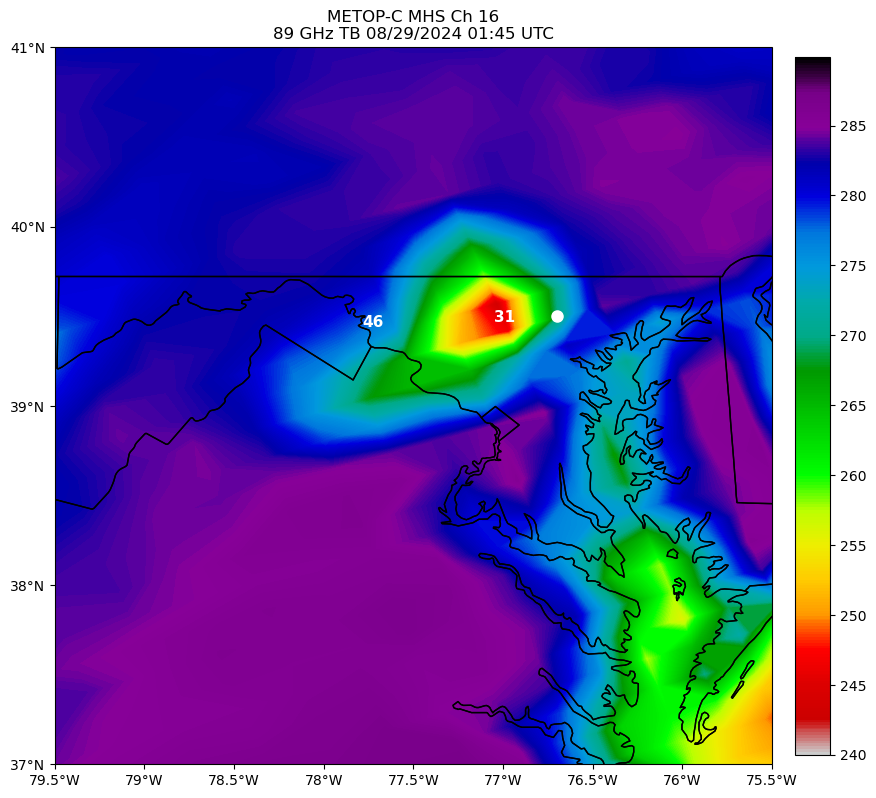

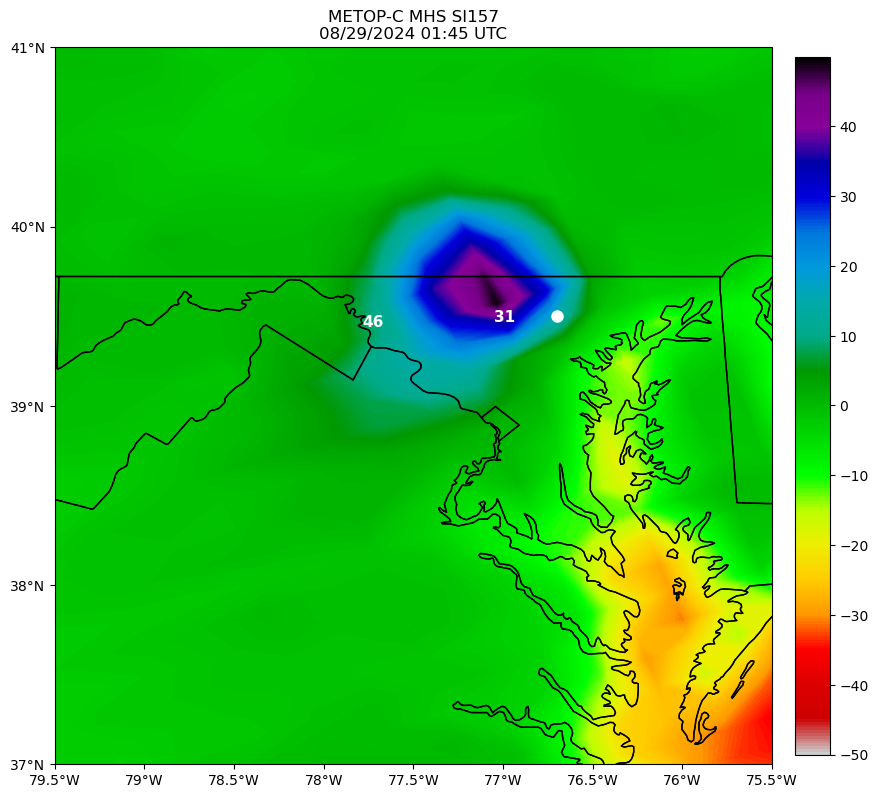

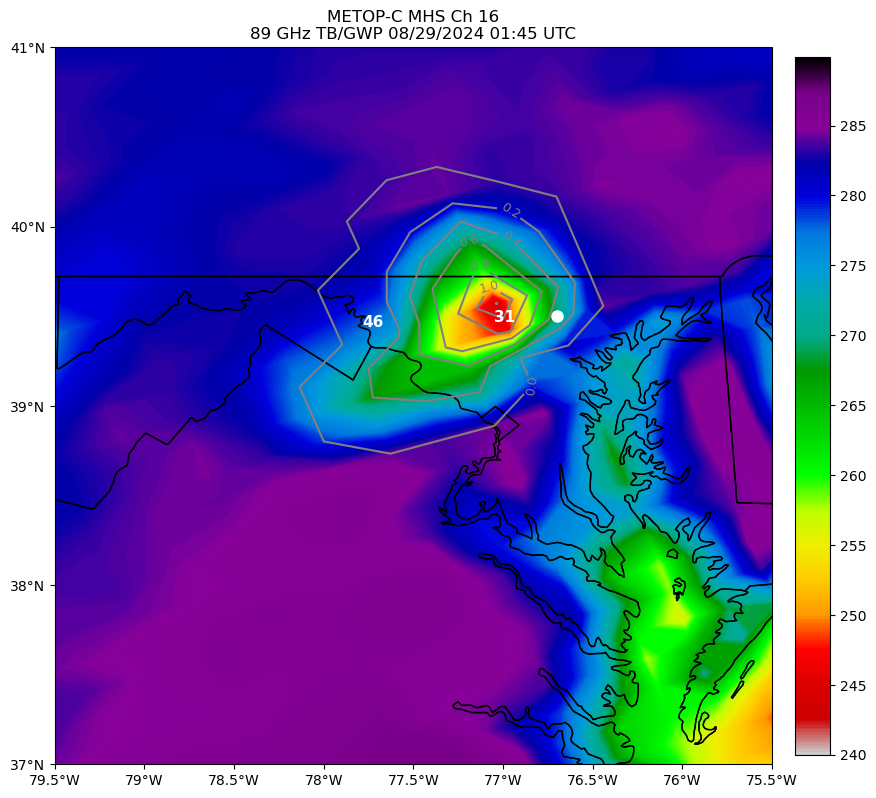

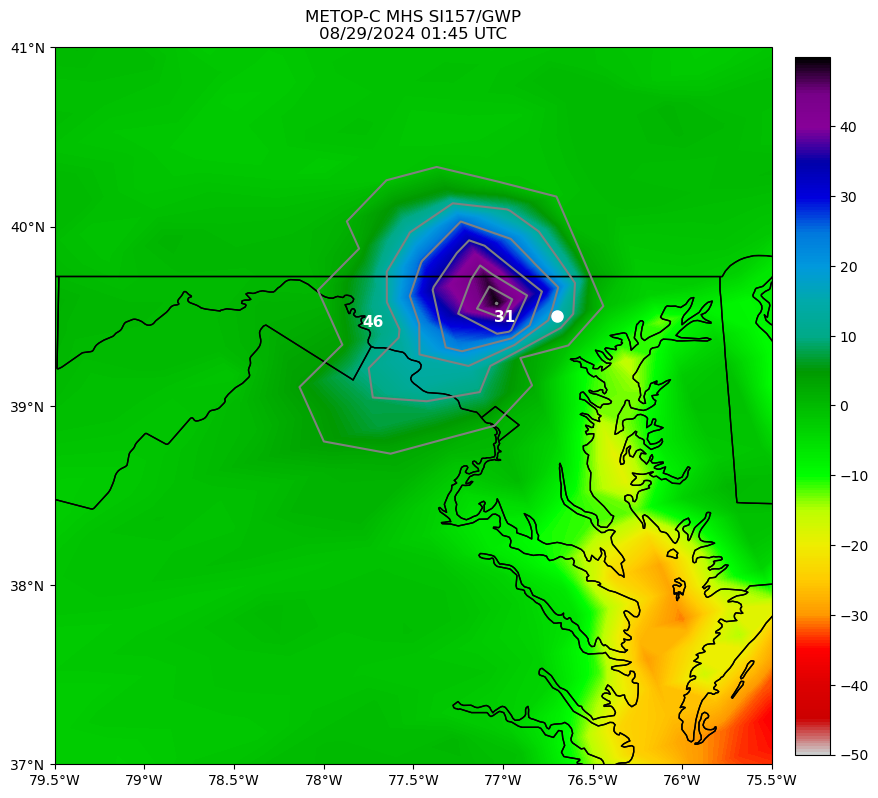

In [6]:
from __future__ import print_function, division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset 
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB = nc_fid.variables["BT"][:]  # shape lat, lon as shown above
    freq = nc_fid.variables["Freq"][:]
    clw = nc_fid.variables["CLW"][:]
    gwp = nc_fid.variables["GWP"][:]
    lats = nc_fid.variables['Latitude'][:]  # extract/copy the data
    lons = nc_fid.variables['Longitude'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB, freq, clw, gwp, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names
"""
Z_file = 'KDFX_V06_20200428_022459.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_35 = ma.masked_where(Z < 35, Z)
print('Z_35 shape', Z_35.shape)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
"""

MHS_file = 'NPR-MIRS-IMG_v11r9_ma3_s202408290015040_e202408290157260_c202408290244230.nc'
TB, freq, clw, gwp, lats, lons, names = read_MHS_plot(MHS_file)
print("Frequency: ", freq)
TB16 = TB[1800:2100,:,15]
TB17 = TB[1800:2100,:,16]
TB20 = TB[1800:2100,:,19]
clw = clw[1800:2100,:]
gwp = gwp[1800:2100,:]
lats = lats[1800:2100,:]
lons = lons[1800:2100,:]
TB16_mn = np.mean(TB16)
TB17_mn = np.mean(TB17)
TB20_mn = np.mean(TB20)
clw_mn = np.mean(clw)
gwp_mn = np.mean(gwp)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("TB16 mean = ", TB16_mn)
print("TB17 mean = ", TB17_mn)
print("TB20 mean = ", TB20_mn)
print("CLW mean = ", clw_mn)
print("GWP mean = ", gwp_mn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB16_max = np.amax(TB16)
TB16_min = np.amin(TB16)
TB17_max = np.amax(TB17)
TB17_min = np.amin(TB17)
TB20_max = np.amax(TB20)
TB20_min = np.amin(TB20)
clw_min = np.amin(clw)
clw_max = np.amax(clw)
gwp_min = np.amin(gwp)
gwp_max = np.amax(gwp)
print("TB16 max =", TB16_max)
print("TB16 min =", TB16_min)
print("TB16 = ", TB16, TB16.shape)
print("TB17 max =", TB17_max)
print("TB17 min =", TB17_min)
print("TB17 = ", TB17, TB17.shape)
print("CLW max =", clw_max)
print("CLW min =", clw_min)
print("CLW = ", clw, clw.shape)
print("GWP max =", gwp_max)
print("GWP min =", gwp_min)
print("GWP = ", gwp, gwp.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

SI157 = TB16 - TB17
SI157_max = np.amax(SI157)
SI157_min = np.amin(SI157)
print("SI157 max =", SI157_max)
print("SI157 min =", SI157_min)
print("SI157 = ", SI157, SI157.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 16\n'
          '89 GHz TB 08/29/2024 01:45 UTC')
levels = np.arange(240,290,0.1)
mi = ax.contourf(lons, lats, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_0145.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS SI157\n'
          '08/29/2024 01:45 UTC')
levels = np.arange(-50,50,0.1)
mi = ax.contourf(lons, lats, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_0145.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS Ch 16\n'
          '89 GHz TB/GWP 08/29/2024 01:45 UTC')
levels = np.arange(240,290,0.1)
mi = ax.contourf(lons, lats, TB16, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons,lats,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.clabel(cl, fontsize=9, inline=1, fmt='%1.1f')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_TB16_GWP_0145.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('METOP-C MHS SI157/GWP\n'
          '08/29/2024 01:45 UTC')
levels = np.arange(-50,50,0.1)
mi = ax.contourf(lons, lats, SI157, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
clevels = np.arange(0,1.5,0.2)
cl = ax.contour(lons,lats,gwp,clevels,colors='gray',vmin=0,vmax=1.5)
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_SI157_GWP_0145.png",dpi=250,bbox_inches='tight')
plt.show()

In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["fcdr_tb150h_img1"][:]  # shape lat, lon as shown above
    TB4 = nc_fid.variables["fcdr_tb183_7h_img1"][:]  # shape lat, lon as shown above
    lats1 = nc_fid.variables['lat_img1'][:]  # extract/copy the data
    lons1 = nc_fid.variables['lon_img1'][:]
    lats2 = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lons2 = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, TB4, lats1, lats2, lons1, lons2, names

SSMIS_file = 'CSU_SSMIS_ICDR_V02R00_F17_D20240828_S2321_E0103_R091922.nc'
TB1, TB2, TB3, TB4, lats1, lats2, lons1, lons2, names = read_SSMIS_plot(SSMIS_file)
"""
FCDR coordinates: 
lats1: 210 - 350
lons1: 210 - 350
lats2: 210 - 350
lons2: 210 - 350
"""
TB1 = TB1[210:350,:]
lats2 = lats2[210:350,:]
lons2 = lons2[210:350,:]
lats_mn = np.mean(lats2)
lons_mn = np.mean(lons2)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[210:350,:]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)
print("Lats = ", lats2, lats2.shape)
print("Lons = ", lons2, lons2.shape)
TB3 = TB3[210:350,:]
lats1 = lats1[210:350,:]
lons1 = lons1[210:350,:]
lats_mn = np.mean(lats1)
lons_mn = np.mean(lons1)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)
TB4 = TB4[210:350,:]
TB4_max = np.amax(TB4)
TB4_min = np.amin(TB4)
print("TB4 max =", TB4_max)
print("TB4 min =", TB4_min)
print("TB4 = ", TB4, TB4.shape)
print("Lats = ", lats1, lats1.shape)
print("Lons = ", lons1, lons1.shape)

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)
del_pct = np.gradient(PCT)
del_pct_x = del_pct[0]
del_pct_y = del_pct[1]
print("PCT Gradient X = ", del_pct_x)
print("PCT Gradient Y = ", del_pct_y)
mag_pct = np.sqrt(del_pct[0]**2 + del_pct[1]**2)
print("PCT Gradient = ", mag_pct)
mag_pct_ma = ma.masked_where(mag_pct < 0.1, mag_pct)
del_ta183_7h = np.gradient(TB4)
del_ta183_7h_x = del_ta183_7h[0]
del_ta183_7h_y = del_ta183_7h[1]
print("ta183_7h Gradient X = ", del_ta183_7h_x)
print("ta183_7h Gradient Y = ", del_ta183_7h_y)
mag_ta183_7h = np.sqrt(del_ta183_7h[0]**2 + del_ta183_7h[1]**2)
print("ta183_7h Gradient = ", mag_ta183_7h)
mag_ta183_7h_ma = ma.masked_where(mag_ta183_7h < 0.1, mag_ta183_7h)

Lats mean=  37.02951
Lons mean=  -85.78901
TB1 max = 295.0
TB1 min = 140.86
TB1 =  [[269.03 271.73 266.99 ... 265.14 267.67 266.6 ]
 [270.24 268.86 268.12 ... 266.68 268.25 267.94]
 [269.41 268.74 263.48 ... 267.32 267.1  268.85]
 ...
 [286.71 285.19 282.62 ... 286.85 284.36 288.31]
 [282.95 283.93 283.86 ... 287.94 286.29 286.07]
 [282.8  283.77 281.83 ... 289.71 289.25 288.04]] (140, 180)
TB2 max = 295.55
TB2 min = 145.0
TB2 =  [[280.02 279.78 280.41 ... 280.63 281.4  279.78]
 [277.42 279.44 277.89 ... 280.6  281.87 281.01]
 [279.08 278.53 279.17 ... 281.01 280.38 281.92]
 ...
 [286.04 285.25 284.62 ... 287.42 288.07 291.12]
 [284.7  284.56 284.91 ... 291.08 288.75 289.3 ]
 [284.82 285.08 283.62 ... 289.78 289.34 288.9 ]] (140, 180)
Lats =  [[26.849 26.954 27.058 ... 24.765 24.651 24.537]
 [26.959 27.064 27.169 ... 24.873 24.759 24.645]
 [27.07  27.175 27.279 ... 24.981 24.867 24.753]
 ...
 [42.012 42.118 42.223 ... 39.444 39.329 39.215]
 [42.123 42.228 42.333 ... 39.55  39.435 39.32

SI150 max = 54.920013
SI150 min = -55.559998
SI150 =  [[-15.790009   -7.5899963 -18.230011  ... -19.019989  -14.929993
  -18.429993 ]
 [ -9.050018  -12.570007  -13.050018  ... -13.970001  -15.149994
  -14.730011 ]
 [-13.889984  -12.180023  -20.799988  ... -15.799988  -16.540009
  -14.97998  ]
 ...
 [  5.819977    2.330017    3.1999817 ...   4.1700134   0.5799866
    6.76001  ]
 [  3.3900146   2.7999878   4.619995  ...   3.7000122   5.8399963
    6.1900024]
 [  2.5499878   3.519989    1.75      ...   4.600006    2.130005
    6.470001 ]] (140, 180)
RR150 max = 30.31049
RR150 min = 0.0
RR150 =  [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [0.11460187286138535 0.01178283616900444 0.025921132415533066 ...
  0.05004999414086342 0.00037192562012933195 0.1662576049566269]
 [0.029916677623987198 0.018601391464471817 0.06456491351127625 ...
  0.0371832437813282 0.11558398604393005 0.133571594953537]
 [0.014743806794285774 0.03284865617752075 0.0057851155288517

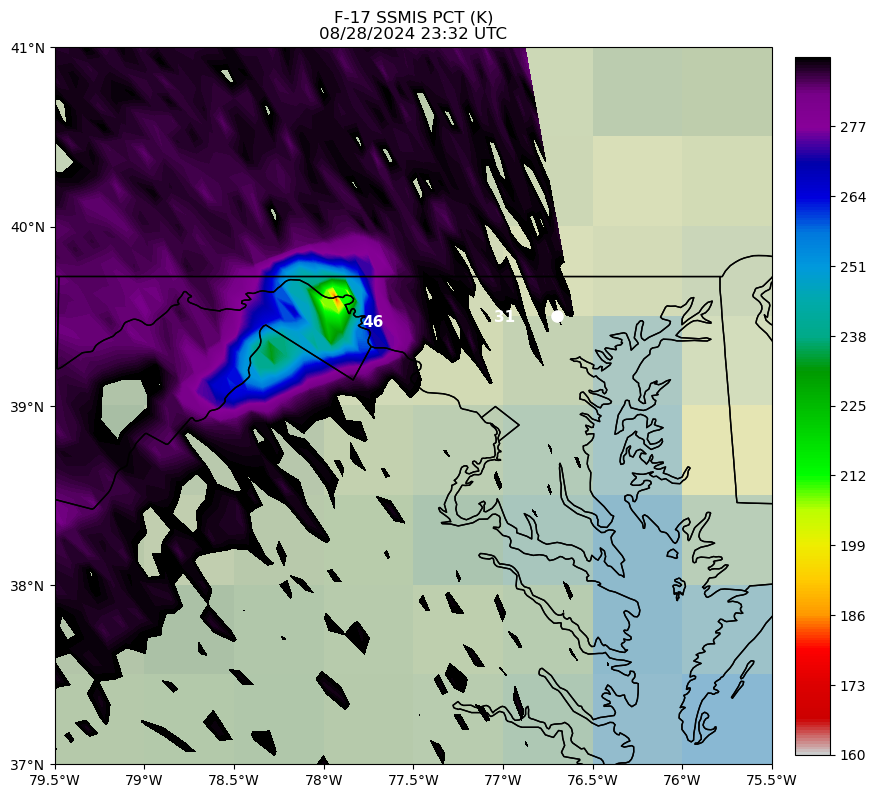

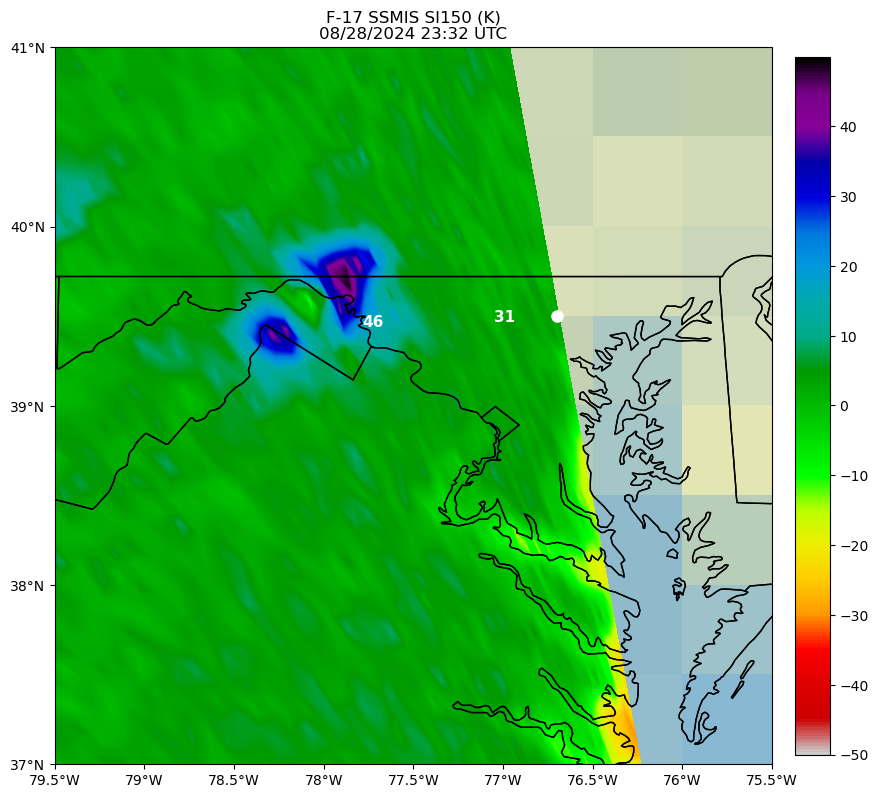

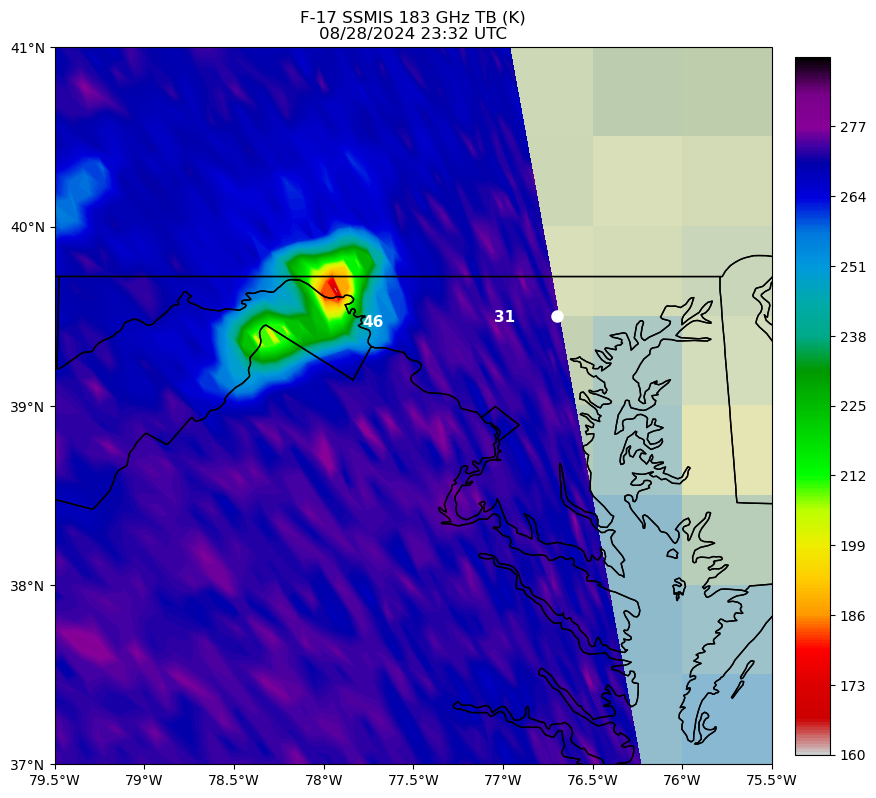

In [2]:
SI150 = TB1 - TB3
SI150_max = np.amax(SI150)
SI150_min = np.amin(SI150)
print("SI150 max =", SI150_max)
print("SI150 min =", SI150_min)
print("SI150 = ", SI150, SI150.shape)

RR150 = 0.00144 * ((SI150)**2.485)
RR150_max = np.amax(RR150)
RR150_min = np.amin(RR150)
print("RR150 max =", RR150_max)
print("RR150 min =", RR150_min)
print("RR150 = ", RR150, RR150.shape)

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

def make_RR150_mask(RR150):
    RR150_1 = ma.masked_where(RR150 < 1, RR150)
    print('RR150_1 =', RR150_1)
    print('RR150_1 shape', RR150_1.shape)
    return RR150_1

RR150_1 = make_RR150_mask(RR150) 

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('F-17 SSMIS PCT (K)\n'
          '08/28/2024 23:32 UTC')
levels = np.arange(160,290,0.1)
mi = ax.contourf(lons2, lats2, PCT, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("f17_pct_2332.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('F-17 SSMIS SI150 (K)\n'
          '08/28/2024 23:32 UTC')
levels = np.arange(-50,50,0.1)
mi = ax.contourf(lons1, lats1, SI150, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("f17_SI150_2332.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 10))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('F-17 SSMIS 183 GHz TB (K)\n'
          '08/28/2024 23:32 UTC')
levels = np.arange(160,290,0.1)
mi = ax.contourf(lons1, lats1, TB4, levels, extent=img_extent, transform=crs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("f17_tb183_7h_2332.png",dpi=250,bbox_inches='tight')
plt.show()

dict_keys(['time', 'time_bounds', 'lat', 'lat_bounds', 'lon', 'lon_bounds', 'cmorph'])
CMORPH: (200, 400) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
Latitude: (200, 400) [[34.63917449 34.63917449 34.63917449 ... 34.63917449 34.63917449
  34.63917449]
 [34.71194586 34.71194586 34.71194586 ... 34.71194586 34.71194586
  34.71194586]
 [34.78471724 34.78471724 34.78471724 ... 34.78471724 34.78471724
  34.78471724]
 ...
 [48.97513556 48.97513556 48.97513556 ... 48.97513556 48.97513556
  48.97513556]
 [49.04790694 49.04790694 49.04790694 ... 49.04790694 49.04790694
  49.04790694]
 [49.12067831 49.12067831 49.12067831 ... 49.12067831 49.12067831
  49.12067831]]
Longitude: (200, 400) [[269.23605363 269.3088103  269.38156697 ... 298.12045123 298.1932079
  298.26596457]
 [269.23605363 269.3088103  269.38156697 ... 298.12045123 298.1932079
  298.26596

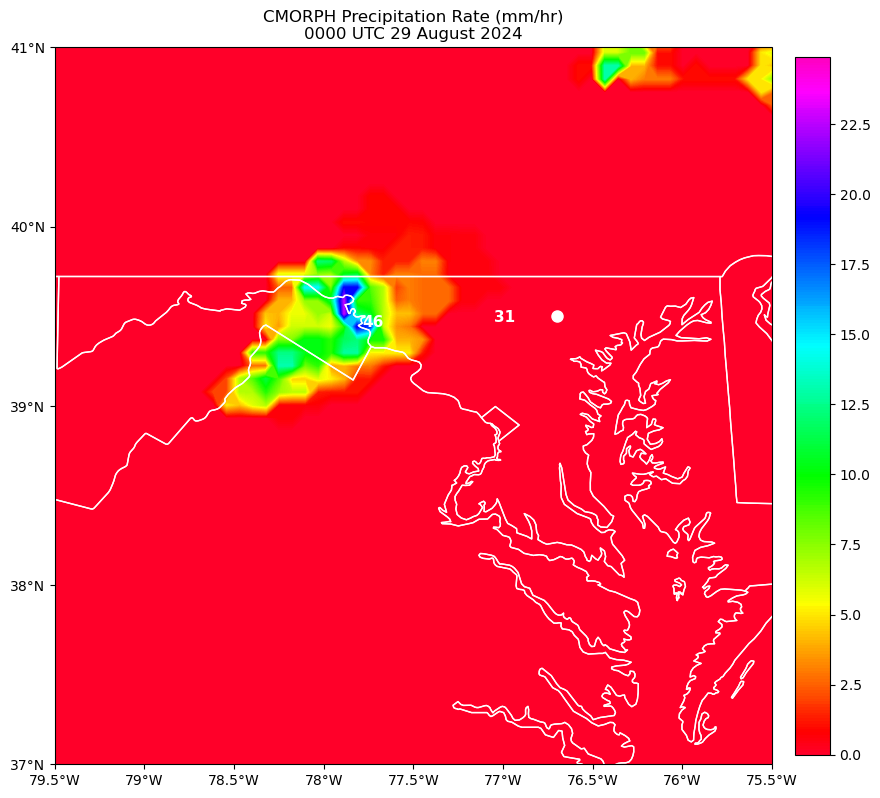

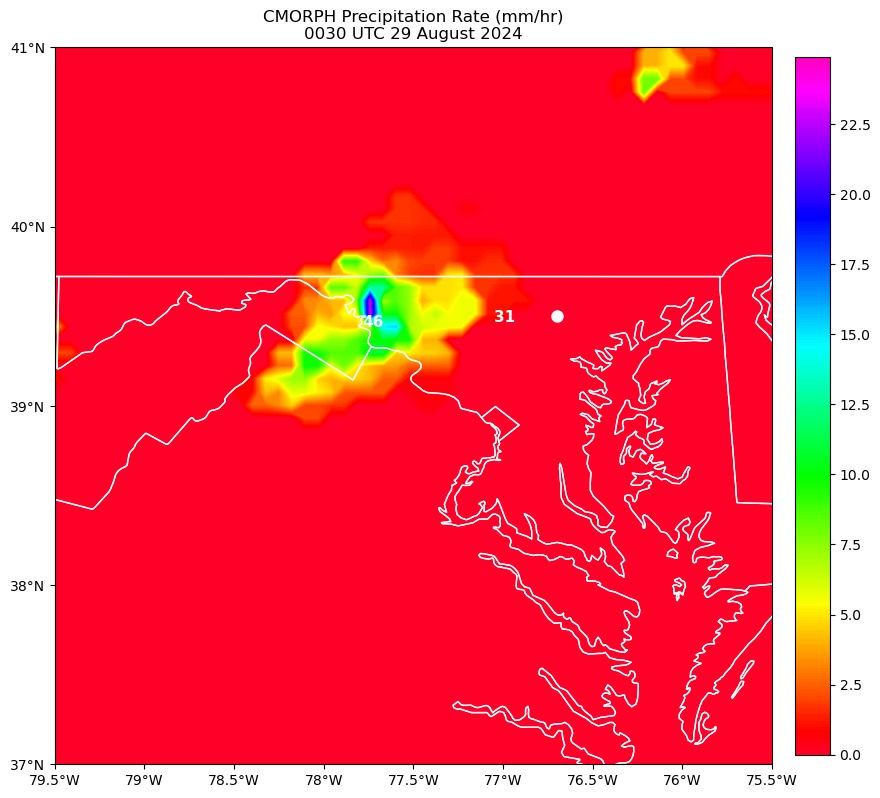

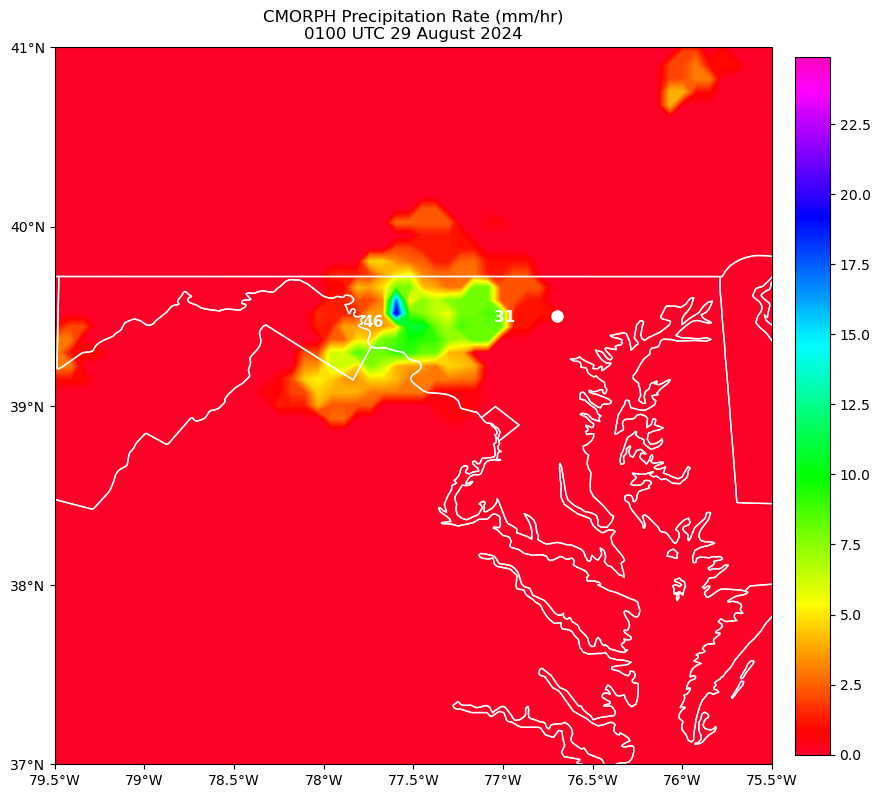

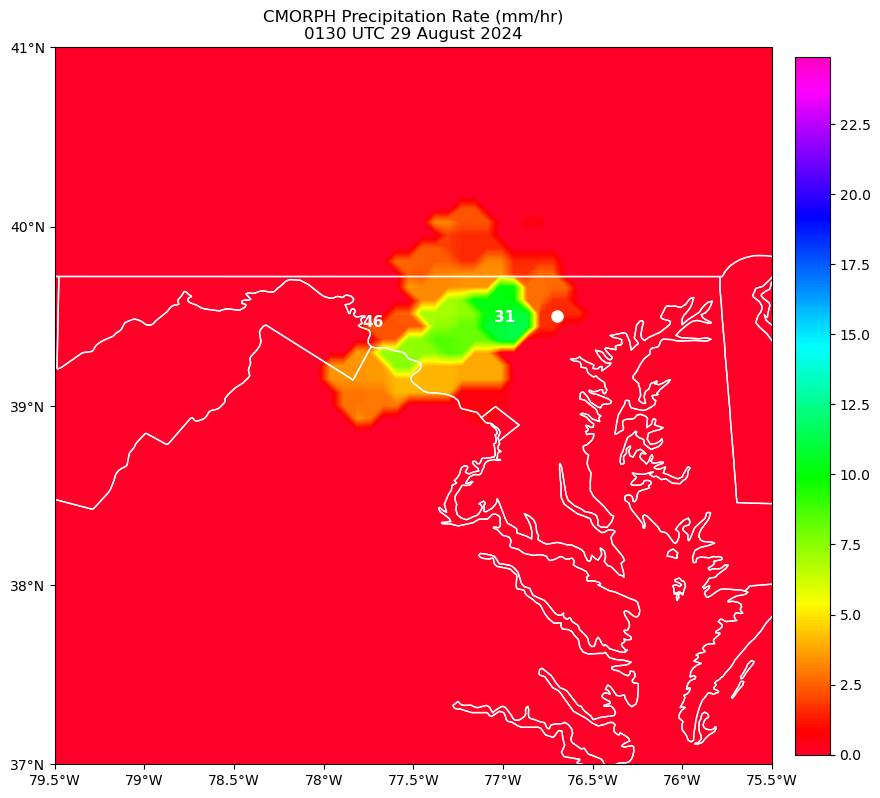

In [1]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm
import pandas as pd

def read_CMORPH_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    cmorph = nc_fid.variables["cmorph"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables["lat"][:]
    lon = nc_fid.variables["lon"][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return cmorph, lat, lon, names

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082900.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0000 = cmorph[0,1300:1500,3700:4100]
cmorph_0000[cmorph_0000>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0000.shape, cmorph_0000)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_0030 = cmorph[1,1300:1500,3700:4100]
cmorph_0030[cmorph_0030>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0030.shape, cmorph_0030)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082901.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0100 = cmorph[0,1300:1500,3700:4100]
cmorph_0100[cmorph_0100>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0100.shape, cmorph_0100)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

cmorph_file = 'CMORPH_V0.x_ADJ_8km-30min_2024082901.nc'
cmorph, lat, lon, names = read_CMORPH_plot(cmorph_file)
cmorph_0130 = cmorph[1,1300:1500,3700:4100]
cmorph_0130[cmorph_0130>25]=22.5
lats = lat[1300:1500]
lons = lon[3700:4100]
latz,lonz = np.meshgrid(lats, lons)
lats2 = np.swapaxes(latz, 0, 1)
lons2 = np.swapaxes(lonz, 0, 1)
print(names)
print('CMORPH:', cmorph_0100.shape, cmorph_0100)
print('Latitude:', lats2.shape, lats2)
print('Longitude:', lons2.shape, lons2)

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0000 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0000,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0000.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0030 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0030,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0030.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0100 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0100,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0100.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-79.5, -75.5, 37.5, 40.5)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-79.5, -75.5, 37.5, 40.5], crs.PlateCarree(globe=None))
ax.stock_img()

plt.title('CMORPH Precipitation Rate (mm/hr)\n' 
          '0130 UTC 29 August 2024')

Plevels = np.arange(0,25,0.1)
cbtd = ax.contourf(lons2,lats2,cmorph_0130,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='gist_rainbow')

ax.set_xticks([-79.5,-79,-78.5,-78,-77.5,-77,-76.5,-76,-75.5])
ax.set_yticks([37,38,39,40,41])

ax.plot(-76.7, 39.5, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-77.726, 39.509, '46', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-76.993103, 39.535433, '31', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.045,pad=0.03)
plt.savefig("cmorph_precip_0130.png",dpi=250,bbox_inches='tight')
plt.show()